# Plot flow cytometry of delivery of Cre mRNA with boosters

# Introduction

## Imports

In [1]:
import sys
import os
import time

import numpy as np
import scipy
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

## Set output parameters

In [2]:
# Set pandas display options
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

# Set plot display options
FONTSIZE = 8  # universal fontsize
params = {
    'font.size': FONTSIZE,
    'axes.titlesize': FONTSIZE,
    'axes.labelsize': FONTSIZE,
    'legend.fontsize': FONTSIZE,
    'xtick.labelsize': FONTSIZE,
    'ytick.labelsize': FONTSIZE,
    'font.family': "Helvetica",
    'mathtext.fontset': 'custom',
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.dpi': 300
   }
mpl.rcParams.update(params)
sns.set_style("ticks", {'axes.grid' : False})

# Set plot output options
output_dir = "outs/flow_Cre_booster"
output_suffix = ""
output_formats = [".png", ".pdf"]

mpl.rc('savefig', dpi=300)

# Define convenience function for saving figures

savefig = True
savefig_args = {"dpi": 300, "bbox_inches": "tight", "pad_inches": 0.1}

def save_figure(fig, name, output_dir=output_dir, output_suffix=output_suffix, output_formats=output_formats, savefig_args=savefig_args):
    if savefig:
        for output_format in output_formats:
            fig.savefig(output_dir + "/" + name + output_suffix + output_format, **savefig_args)
    return None

In [3]:
# Report plot parameters
sns.plotting_context()

{'font.size': 8.0,
 'axes.labelsize': 8.0,
 'axes.titlesize': 8.0,
 'xtick.labelsize': 8.0,
 'ytick.labelsize': 8.0,
 'legend.fontsize': 8.0,
 'legend.title_fontsize': None,
 'axes.linewidth': 0.8,
 'grid.linewidth': 0.8,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 0.8,
 'ytick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.minor.width': 0.6,
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0}

# Load data

In [4]:
infile = "../preprocessed_data/flow_data/flow_Cre_booster_summary.csv"

df_raw = pd.read_csv(infile, index_col=None)

print(df_raw.shape)
df_raw

(21, 19)


,Plate Number,Well Number,Condition Number,Condition Name,Exporter?,Cargo?,Export Tag?,Fusogen?,Total Ungated Events (Depth: 0),Putative Acacia Events (Depth: 1),% of Putative Acacia Events in Total Events,Singlet Gated Acacia Events (Depth: 2),% of Singlet Gated Events in Putative Acacia Events,GFP-A Events in Acacia Singlet (Depth: 3),% of GFP-A Events in Acacia Singlet,mCherry-A Events in GFP-A POI (Depth: 4),% of mCherry-A Events in GFP-A POI,Matched No Booster,Fold-change compared to No Booster
0,1,C1,25,half_allDNA_EPN24_Cre_VSVG,+,+,-,+,40000,25460,63.6500,24087,94.607227,22672,94.125462,62,0.273465,1.88,0.145460
1,1,C2,26,half_allDNA_EPN24_Cre_VSVG,+,+,-,+,40000,25907,64.7675,24574,94.854672,23245,94.591845,38,0.163476,1.88,0.086955
2,1,C3,27,half_allDNA_EPN24_Cre_VSVG,+,+,-,+,40000,25216,63.0400,23927,94.888166,22687,94.817570,44,0.193944,1.88,0.103162
3,1,C7,31,half_allDNA_EPN24_Cre_VSVG_(Booster_CIT_1250ng),+,+,-,+,40000,25545,63.8625,24172,94.625171,22922,94.828727,59,0.257395,1.88,0.136912
4,1,C8,32,half_allDNA_EPN24_Cre_VSVG_(Booster_CIT_1250ng),+,+,-,+,40000,23324,58.3100,21645,92.801406,20390,94.201894,38,0.186366,1.88,0.099131
5,1,C9,33,half_allDNA_EPN24_Cre_VSVG_(Booster_CIT_1250ng),+,+,-,+,40000,22973,57.4325,21304,92.734950,20072,94.217048,31,0.154444,1.88,0.082151
6,1,C10,34,half_allDNA_EPN24_Cre_VSVG_(Booster_NEDD4Ldelt...,+,+,-,+,40000,23075,57.6875,21421,92.832069,20239,94.482050,53,0.261871,1.88,0.139293
7,1,C11,35,half_allDNA_EPN24_Cre_VSVG_(Booster_NEDD4Ldelt...,+,+,-,+,40000,23414,58.5350,21796,93.089605,20513,94.113599,31,0.151124,1.88,0.080385
8,1,C12,36,half_allDNA_EPN24_Cre_VSVG_(Booster_NEDD4Ldelt...,+,+,-,+,40000,25963,64.9075,24668,95.012133,23194,94.024647,51,0.219884,1.88,0.116960
9,1,D1,37,half_allDNA_EPN24_CreMS2_VSVG,+,+,+,+,40000,26413,66.0325,25101,95.032749,23801,94.820923,310,1.302466,1.88,0.692801



# Plot delivery enhancement (fold-change compared to no enhancer)

In [5]:
# Select data
conditions = ["half_allDNA_EPN24_CreMS2_VSVG_(Booster_CIT_1250ng)",
              "half_allDNA_EPN24_Cre_VSVG_(Booster_CIT_1250ng)",
              "half_allDNA_EPN24_CreMS2_VSVG_(Booster_NEDD4LdeltaC2_1250ng)",
              "half_allDNA_EPN24_Cre_VSVG_(Booster_NEDD4LdeltaC2_1250ng)",
              "half_allDNA_EPN24_CreMS2_VSVG",
              "half_allDNA_EPN24_Cre_VSVG",
              "half_allDNA_Transfection_Reagents_Alone"]


selector = df_raw["Condition Name"].isin(conditions)
data = df_raw.loc[selector]

print(data.shape)
data.head()

(21, 19)


,Plate Number,Well Number,Condition Number,Condition Name,Exporter?,Cargo?,Export Tag?,Fusogen?,Total Ungated Events (Depth: 0),Putative Acacia Events (Depth: 1),% of Putative Acacia Events in Total Events,Singlet Gated Acacia Events (Depth: 2),% of Singlet Gated Events in Putative Acacia Events,GFP-A Events in Acacia Singlet (Depth: 3),% of GFP-A Events in Acacia Singlet,mCherry-A Events in GFP-A POI (Depth: 4),% of mCherry-A Events in GFP-A POI,Matched No Booster,Fold-change compared to No Booster
0,1,C1,25,half_allDNA_EPN24_Cre_VSVG,+,+,-,+,40000,25460,63.6500,24087,94.607227,22672,94.125462,62,0.273465,1.88,0.145460
1,1,C2,26,half_allDNA_EPN24_Cre_VSVG,+,+,-,+,40000,25907,64.7675,24574,94.854672,23245,94.591845,38,0.163476,1.88,0.086955
2,1,C3,27,half_allDNA_EPN24_Cre_VSVG,+,+,-,+,40000,25216,63.0400,23927,94.888166,22687,94.817570,44,0.193944,1.88,0.103162
3,1,C7,31,half_allDNA_EPN24_Cre_VSVG_(Booster_CIT_1250ng),+,+,-,+,40000,25545,63.8625,24172,94.625171,22922,94.828727,59,0.257395,1.88,0.136912
4,1,C8,32,half_allDNA_EPN24_Cre_VSVG_(Booster_CIT_1250ng),+,+,-,+,40000,23324,58.3100,21645,92.801406,20390,94.201894,38,0.186366,1.88,0.099131


In [6]:
# Set colors

color_exporter_Gag = "#31a354"
color_exporter_engineered = "#756bb1"

color_no_packaging_signal = "#969696"
color_no_RBD = "#d9d9d9"
color_no_exporter = "#525252"

palette = [color_exporter_engineered, color_no_packaging_signal,
           color_exporter_engineered, color_no_packaging_signal, 
           color_no_exporter, color_no_packaging_signal, 
           color_no_packaging_signal, color_no_packaging_signal]

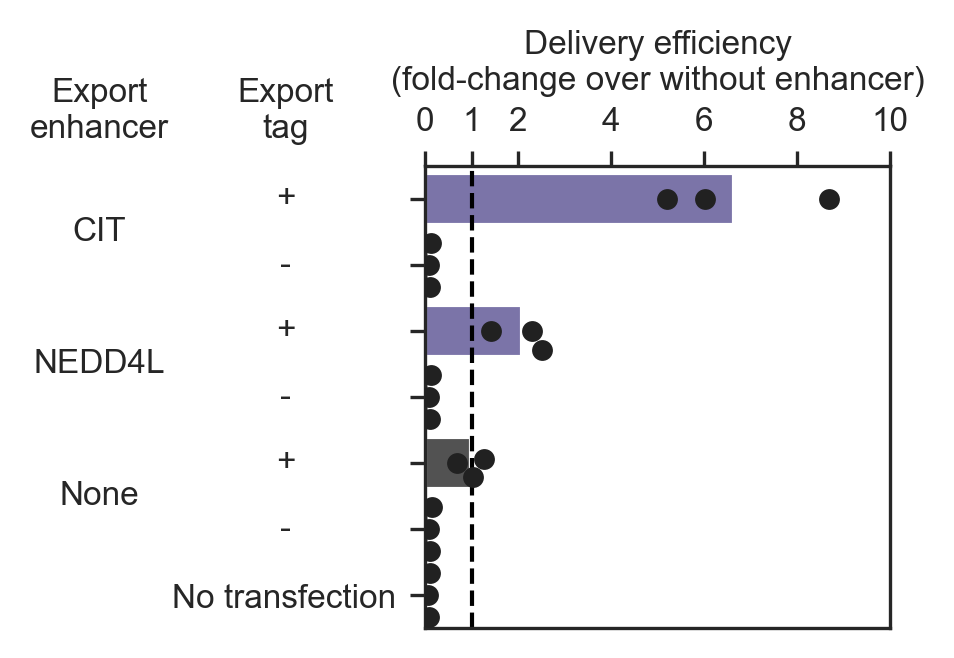

In [7]:
# Simple

# Map conditions to x values
condition_to_x = dict(zip(conditions, range(len(conditions))))
data["x"] = data["Condition Name"].map(condition_to_x)

# Sort dataframe by x values
data = data.sort_values(by="x")

# Calculate summary statistic (mean)
summary = data.groupby("Condition Name").mean().reset_index()

# Create plot
fig, ax = plt.subplots(1, 1, figsize=(2,2))

# Plot summary
x = summary["Fold-change compared to No Booster"]
y = summary["x"]
sns.barplot(ax=ax, x=x, y=y, orient="h", palette=palette)

# Plot swarm
x = data["Fold-change compared to No Booster"]
y = data["x"]
sns.swarmplot(ax=ax, data=data, x="Fold-change compared to No Booster", y="x", orient="h", color="#212121")

# Set axis limits
ax.set_xlim(0, 10)

ax.set_xticks([0, 1, 2, 4, 6, 8, 10])

# Set labels
ax.set_xlabel("Delivery efficiency\n(fold-change over without enhancer)")
ax.set_ylabel("")

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 

# Set tick labels
yticklabels = ["",
               "",
               "",
               "",
               "",
               "",
               "No transfection"]

ax.set_yticklabels(yticklabels)

# Set export tag label

y_pos_labels = np.array(range(0,6))
y_pos_labels_midpoints = y_pos_labels.reshape(-1, 2).mean(axis=1).reshape(-1)  # calculate halfway between each tick

x_pos_text_booster = -7
x_pos_text_tag = -3

labels_tag = ["+", "-", "+", "-", "+", "-"]
for label, y_pos in zip(labels_tag, y_pos_labels):
    ax.text(x_pos_text_tag, y_pos, label, ha="center", va="center", size=FONTSIZE)

labels_booster = ["CIT", "NEDD4L", "None"]
for label, y_pos in zip(labels_booster, y_pos_labels_midpoints):
    ax.text(x_pos_text_booster, y_pos, label, ha="center", va="center", size=FONTSIZE)
    
# Set tick annotation column labels
ax.text(x_pos_text_booster, -1.85, "Export\nenhancer", ha="center", va="top", size=FONTSIZE)
ax.text(x_pos_text_tag, -1.85, "Export\ntag", ha="center", va="top", size=FONTSIZE)

ax.axvline(1, ls="--", lw=1, color="k")

# Save figure
save_figure(fig, "barplot_flow_boost")

# Calculate statistical significance of differences

In [8]:
from scipy.stats import ttest_ind

In [9]:
# Select data
conditions = ["half_allDNA_EPN24_CreMS2_VSVG_(Booster_CIT_1250ng)",
              "half_allDNA_EPN24_Cre_VSVG_(Booster_CIT_1250ng)",
              "half_allDNA_EPN24_CreMS2_VSVG_(Booster_NEDD4LdeltaC2_1250ng)",
              "half_allDNA_EPN24_Cre_VSVG_(Booster_NEDD4LdeltaC2_1250ng)",
              "half_allDNA_EPN24_CreMS2_VSVG",
              "half_allDNA_EPN24_Cre_VSVG",
              "half_allDNA_Transfection_Reagents_Alone"]


selector = df_raw["Condition Name"].isin(conditions)
data = df_raw.loc[selector]

print(data.shape)
data.head()

(21, 19)


,Plate Number,Well Number,Condition Number,Condition Name,Exporter?,Cargo?,Export Tag?,Fusogen?,Total Ungated Events (Depth: 0),Putative Acacia Events (Depth: 1),% of Putative Acacia Events in Total Events,Singlet Gated Acacia Events (Depth: 2),% of Singlet Gated Events in Putative Acacia Events,GFP-A Events in Acacia Singlet (Depth: 3),% of GFP-A Events in Acacia Singlet,mCherry-A Events in GFP-A POI (Depth: 4),% of mCherry-A Events in GFP-A POI,Matched No Booster,Fold-change compared to No Booster
0,1,C1,25,half_allDNA_EPN24_Cre_VSVG,+,+,-,+,40000,25460,63.6500,24087,94.607227,22672,94.125462,62,0.273465,1.88,0.145460
1,1,C2,26,half_allDNA_EPN24_Cre_VSVG,+,+,-,+,40000,25907,64.7675,24574,94.854672,23245,94.591845,38,0.163476,1.88,0.086955
2,1,C3,27,half_allDNA_EPN24_Cre_VSVG,+,+,-,+,40000,25216,63.0400,23927,94.888166,22687,94.817570,44,0.193944,1.88,0.103162
3,1,C7,31,half_allDNA_EPN24_Cre_VSVG_(Booster_CIT_1250ng),+,+,-,+,40000,25545,63.8625,24172,94.625171,22922,94.828727,59,0.257395,1.88,0.136912
4,1,C8,32,half_allDNA_EPN24_Cre_VSVG_(Booster_CIT_1250ng),+,+,-,+,40000,23324,58.3100,21645,92.801406,20390,94.201894,38,0.186366,1.88,0.099131


In [10]:
# Index by condition
data_temp = data.set_index("Condition Name")

# Report values
data_temp["% of mCherry-A Events in GFP-A POI"]

Condition Name
half_allDNA_EPN24_Cre_VSVG                                       0.273465
half_allDNA_EPN24_Cre_VSVG                                       0.163476
half_allDNA_EPN24_Cre_VSVG                                       0.193944
half_allDNA_EPN24_Cre_VSVG_(Booster_CIT_1250ng)                  0.257395
half_allDNA_EPN24_Cre_VSVG_(Booster_CIT_1250ng)                  0.186366
half_allDNA_EPN24_Cre_VSVG_(Booster_CIT_1250ng)                  0.154444
half_allDNA_EPN24_Cre_VSVG_(Booster_NEDD4LdeltaC2_1250ng)        0.261871
half_allDNA_EPN24_Cre_VSVG_(Booster_NEDD4LdeltaC2_1250ng)        0.151124
half_allDNA_EPN24_Cre_VSVG_(Booster_NEDD4LdeltaC2_1250ng)        0.219884
half_allDNA_EPN24_CreMS2_VSVG                                    1.302466
half_allDNA_EPN24_CreMS2_VSVG                                    2.388258
half_allDNA_EPN24_CreMS2_VSVG                                    1.943777
half_allDNA_EPN24_CreMS2_VSVG_(Booster_CIT_1250ng)              16.317181
half_allDNA_EPN24_CreMS

In [11]:
label1 = "half_allDNA_EPN24_CreMS2_VSVG_(Booster_CIT_1250ng)"
label2 = "half_allDNA_EPN24_CreMS2_VSVG"

counts1 = data_temp["% of mCherry-A Events in GFP-A POI"].loc[label1]
counts2 = data_temp["% of mCherry-A Events in GFP-A POI"].loc[label2]

# Report data
print(counts1)
print("Mean:", counts1.mean())
print("STD:", counts1.std())
print()

print(counts2)
print("Mean:", counts2.mean())
print("STD:", counts2.std())
print()

# Test
ttest_ind(counts1, counts2, equal_var=False)

Condition Name
half_allDNA_EPN24_CreMS2_VSVG_(Booster_CIT_1250ng)    16.317181
half_allDNA_EPN24_CreMS2_VSVG_(Booster_CIT_1250ng)    11.305308
half_allDNA_EPN24_CreMS2_VSVG_(Booster_CIT_1250ng)     9.797104
Name: % of mCherry-A Events in GFP-A POI, dtype: float64
Mean: 12.473197786666667
STD: 3.4133308138520952

Condition Name
half_allDNA_EPN24_CreMS2_VSVG    1.302466
half_allDNA_EPN24_CreMS2_VSVG    2.388258
half_allDNA_EPN24_CreMS2_VSVG    1.943777
Name: % of mCherry-A Events in GFP-A POI, dtype: float64
Mean: 1.8781670730000002
STD: 0.5458612218798501



Ttest_indResult(statistic=5.308854856136907, pvalue=0.03024853601895679)

In [12]:
label1 = "half_allDNA_EPN24_CreMS2_VSVG_(Booster_NEDD4LdeltaC2_1250ng)"
label2 = "half_allDNA_EPN24_CreMS2_VSVG"

counts1 = data_temp["% of mCherry-A Events in GFP-A POI"].loc[label1]
counts2 = data_temp["% of mCherry-A Events in GFP-A POI"].loc[label2]

# Report data
print(counts1)
print("Mean:", counts1.mean())
print("STD:", counts1.std())
print()

print(counts2)
print("Mean:", counts2.mean())
print("STD:", counts2.std())
print()

# Test
ttest_ind(counts1, counts2, equal_var=False)

Condition Name
half_allDNA_EPN24_CreMS2_VSVG_(Booster_NEDD4LdeltaC2_1250ng)    4.325784
half_allDNA_EPN24_CreMS2_VSVG_(Booster_NEDD4LdeltaC2_1250ng)    4.721155
half_allDNA_EPN24_CreMS2_VSVG_(Booster_NEDD4LdeltaC2_1250ng)    2.675303
Name: % of mCherry-A Events in GFP-A POI, dtype: float64
Mean: 3.9074140393333336
STD: 1.0851973480869832

Condition Name
half_allDNA_EPN24_CreMS2_VSVG    1.302466
half_allDNA_EPN24_CreMS2_VSVG    2.388258
half_allDNA_EPN24_CreMS2_VSVG    1.943777
Name: % of mCherry-A Events in GFP-A POI, dtype: float64
Mean: 1.8781670730000002
STD: 0.5458612218798501



Ttest_indResult(statistic=2.8934007936996147, pvalue=0.06409346835129438)